<a href="https://colab.research.google.com/github/maevezhw/regularization-from-scratch/blob/main/Logistic%20Regression%20with%20Regularization%20from%20Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Logistic Regression from Scratch



* Nama: Maeve Zahwa Adriana Crown Zaki
* NIM: 21/477527/PA/20675
* Kelas: KOM A



## Import Library

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Load the Iris data from scikit learn and divide the data into two parts: training and test data with ratio 80:20. Make sure that the class within each parts of the data is balance. (score: 1)

Pertama, dataset Iris diunggah terlebih dahulu menggunakan bantuan library, kemudian untuk menentukan fitur apa yang akan digunakan, perlu dilihat dulu ada fitur apa saja di dalam dataset tersebut

In [ ]:
iris = datasets.load_iris()
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Di sini saya menggunakan fitur Sepal Length dan Sepal Width serta menggunakan default target dari dataset sebagai targetnya

In [ ]:
X = iris.data[:, :2]
y = iris.target

In [ ]:
print(X[:5]) # menampilkan 5 data teratas

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


Sebelum memroses data, dilakukan proses feature scaling pada data fitur yang ada agar hasil prediksi lebih akurat (terutama karena data akan diproses menggunakan logistic regression yang linear) dengan menggunakan bantuan dari library preprocessing.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
print(X[:5])

[[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]]


Data kemudian di-split train:test = 80%: 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Dan kemudian dilihat persebarannya apakah jumlah data per kelas di train dan test sudah merata, dapat dilihat dari kode di bawah bahwasanya persebarannya sudah cukup merata

In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 41, 0: 40, 2: 39})
Counter({2: 11, 0: 10, 1: 9})


## 2. Using scatter plot (matplotlib), visualise the Iris data (training part only) (score: 1)

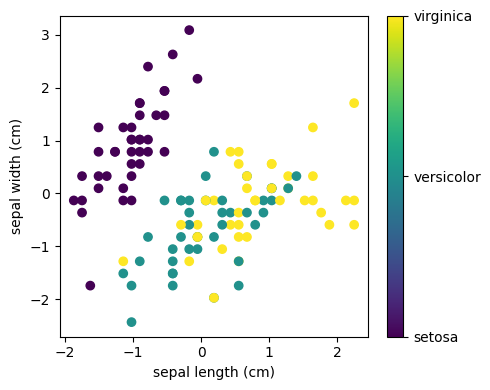

In [ ]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()

## 3. Define a python function for sigmoid function (score:1)

In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## 4. Define a python function of the cost function and add regularisation (score:2)

In [ ]:
def cost_function(theta, x, y, lambda_, reg):
    m, n = x.shape # m menandakan banyak baris dan n menandakan banyak kolom
    hyp = sigmoid(np.dot(x, theta)) # hypothesis pada logistic regression menggunakan fungsi sigmoid dengan parameter z = x.theta atau theta transpose.x

    # menghitung cost function pada fungsi tanpa regularisasi
    cost = (y*np.log(hyp))+((1-y)*np.log(1-hyp))
    normal_cost = (-1/m) * np.sum(cost)

    # menghitung cost function pada fungsi dengan regularisasi
    reg_func = lambda_/(2*m) * np.sum(np.square(theta[1:]))
    total_regularized_cost = normal_cost + reg_func

    # menentukan nilai output berdasar permintaan (apakah diregularisasi atau tidak)
    if reg: return total_regularized_cost
    else: return normal_cost


## 5. Define a python function for the Gradient Descent algorithm (score: 1)

In [ ]:
def gradient_descent (theta, x, y, lambda_, alpha, max_iter, reg):
    m, n = x.shape # m = banyak baris, n = banyak kolom
    costs = [] # menyimpan histori perubahan nilai cost
    theta_temp = theta

    for i in range(max_iter): # melakukan pengulangan sebanyak maximum iteration
        hyp = sigmoid(np.dot(x, theta_temp)) # hypothesis

        # menghitung nilai variabel yang digunakan untuk gradient descent
        grad = (1/m) * np.dot(x.T, (hyp-y))

        if reg: # hanya ditambahkan jika diminta perhitungan fungsi yang telah di-regularisasi
          grad[1:] += (lambda_/m) * theta_temp[1:] # hanya dari theta ke-1 karena sesuai rumus grad.descent ini hanya untuk j > 0

        theta_temp -= alpha * grad # pengurangan pada theta untuk mendapatkan theta terbaik agar hasil cost function minimum

        # menyimpan nilai cost untuk setiap theta
        costs.append(cost_function(theta_temp, x, y, lambda_, reg))

        # menampilkan histori cost tiap 10 iterasi
        if i%10 == 0:
          print(f"Cost untuk iterasi ke-{i} : {costs[i]}")

    return theta_temp, costs

## 6. Train your Logistic Regression algorithm on the training data, set learning rate: 0.001 and maximum iteration: 100 (score: 1.5)

Membuat fungsi train

In [ ]:
def train(x, y, lambda_, alpha, max_iter, reg):
  # pada logistic regression, biasanya ada bias (theta 0 pada hypothesis)
  # theta 0 tanpa variabel x (fitur) menandakan bahwasanya ada satu kolom tambahan yang bernilai 1 agar pada hypothesis bagian theta 0 tidak memiliki fitur

  bias = np.ones(x.shape[0]) # menambahkan satu kolom bias bernilai 1 sejumlah baris pada x
  x_with_bias = np.c_[bias, x] # menggabungkan kolom bias dengan kolom x

  # inisialisasi theta awal (barisnya sejumlah kolom X dengan bias dan kolomnya sejumlah banyak kelas)
  # nantinya nilai theta tiap fitur akan disimpan per baris (karena itu jumlah baris = jumlah kolom = jumlah fitur)

  theta_all_class = np.zeros((x_with_bias.shape[1], len(np.unique(y))))
  costs = np.zeros((max_iter, len(np.unique(y))))

  for i in range(len(np.unique(y))):
    y_train_one_vs_all = np.where(y == i, 1, 0) # one vs all, kalau kelasnya = i, maka nilainya 1, sementara kelas lainnya bernilai 0

    print(f"Class {i}: \n")
    print("Histori cost: ")
    theta_all_class[:, i], costs[:, i] = gradient_descent(theta_all_class[:, i], x_with_bias, y_train_one_vs_all, lambda_, alpha, max_iter, reg)
    print(f"\nTheta: {theta_all_class[:, i]}\n")

  return (theta_all_class, costs)

Latih data train dan simpan hasil theta yang paling optimum dengan nilai lambda = 1, alpha/learning rate = 0.001, max_iter = 100 dan diregularisasi


In [ ]:
theta_optimum, cost_total= train(X_train, y_train, 1, 0.001, 100, 1)

Class 0: 

Histori cost: 
Cost untuk iterasi ke-0 : 0.6929255437222179
Cost untuk iterasi ke-10 : 0.690715986399718
Cost untuk iterasi ke-20 : 0.6885187639037476
Cost untuk iterasi ke-30 : 0.6863338064772019
Cost untuk iterasi ke-40 : 0.6841610445139438
Cost untuk iterasi ke-50 : 0.6820004085642215
Cost untuk iterasi ke-60 : 0.6798518293399743
Cost untuk iterasi ke-70 : 0.6777152377200241
Cost untuk iterasi ke-80 : 0.6755905647551556
Cost untuk iterasi ke-90 : 0.6734777416730853

Theta: [-0.01648205 -0.03195749  0.02938216]

Class 1: 

Histori cost: 
Cost untuk iterasi ke-0 : 0.6930663088772686
Cost untuk iterasi ke-10 : 0.6922600611211909
Cost untuk iterasi ke-20 : 0.6914582849513087
Cost untuk iterasi ke-30 : 0.690660955238869
Cost untuk iterasi ke-40 : 0.6898680469355266
Cost untuk iterasi ke-50 : 0.6890795350744661
Cost untuk iterasi ke-60 : 0.6882953947714923
Cost untuk iterasi ke-70 : 0.6875156012260951
Cost untuk iterasi ke-80 : 0.6867401297224852
Cost untuk iterasi ke-90 : 0.68

## 7. Find thetha(s) that minimize the cost function, and plot the decision boundary using matplotlib. (score: 1)

In [ ]:
print(f"Theta optimum untuk seluruh kelas: \n{theta_optimum}")

Theta optimum untuk seluruh kelas: 
[[-0.01648205 -0.01563359 -0.01726961]
 [-0.03195749  0.00511935  0.02885622]
 [ 0.02938216 -0.02272232 -0.00714308]]


Plot Decision Boundary

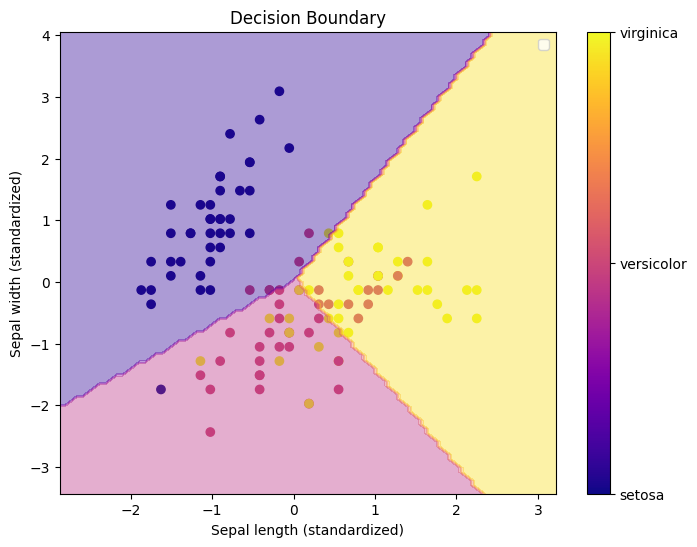

In [ ]:
# Membuat fungsi scatter plot-nya
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap = 'plasma')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Membuat decision boundaries
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.07), np.arange(x2_min, x2_max, 0.07))

for i in range(0, 3):
    Z = np.dot(np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()], theta_optimum) # ditambahkan np.ones(xx1.ravel()) untuk bias
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap = 'plasma')

plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Decision Boundary')
plt.legend()
plt.show()

## 8. Test your Logistic Regression model on the test data, and calculate the accuracy (create function for accuracy, do not use the function from scikit learn library) (score: 1.5)

Membuat fungsi prediksi

In [ ]:
def predict(theta, x):
    bias = np.ones(x.shape[0]) # menambahkan satu kolom bias bernilai 1 sejumlah baris pada x
    x_bias = np.c_[bias, x] # menggabungkan kolom bias dengan kolom x

    hyp_class = sigmoid(np.dot(x_bias, theta)) # menghitung nilai sigmoid untuk tiap kelas pada tiap baris
    return np.argmax(hyp_class, axis = 1) # melihat nilai sigmoid di kelas mana yang paling tinggi di tiap barisnya, kemudian mengembalikan index dari kolom tersebut (karena kelas = index kolom, maka sama saja mengembalikan kelas yg sesuai)

Melakukan prediksi pada data test dan membandingkannya

In [ ]:
y_pred = predict(theta_optimum, X_test)

In [ ]:
compare_y = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
compare_y.head()

,y_test,y_pred
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2


Membuat fungsi akurasi dan mengecek akurasi prediksi

In [ ]:
def accuracy(y_pred, y_test):
  accuracy = np.mean(y_pred == y_test) * 100 # menghitung rata-rata dari banyaknya hasil prediksi yang sesuai
  print(f"Accuracy: {accuracy}%")

In [ ]:
accuracy(y_pred, y_test)

Accuracy: 93.33333333333333%


## 9. Plot your cost function using matplotlib (cost function vs iteration) (score: 1)

Cost Function untuk masing-masing kelas

In [ ]:
def plot_cost_function (cost, num_class):
  plt.plot(cost)
  plt.xlabel('Iteration')
  plt.ylabel('Cost')
  plt.legend([f"Kelas {i}" for i in range (0,num_class)])
  plt.title('Cost Function untuk Masing-masing Kelas')
  plt.show()

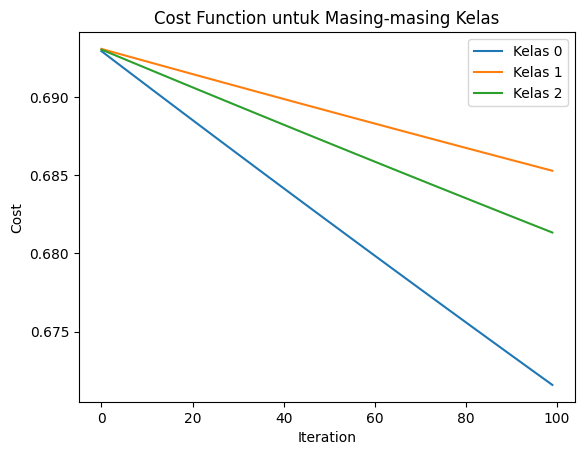

In [ ]:
plot_cost_function(cost_total, len(np.unique(y_test)))

Dapat dilihat bahwasanya nilai cost function menurun sehingga bisa mencapai titik minimum agar menghasilkan hipotesis yang sesuai. Bentuknya tidak logaritmik karena learning ratenya kecil dan iterasinya hanya sedikit, apabila learning rate dan jumlah iterasi dinaikkan harusnya akan membentuk fungsi logaritma, sebagai pembanding :

In [ ]:
theta_optimum_comparation, cost_total_comparation= train(X_train, y_train, 1, 0.1, 1000, 1) # alpha/learning rate = 0.1 dan iterasi = 1000

Class 0: 

Histori cost: 
Cost untuk iterasi ke-0 : 0.6712905464787672
Cost untuk iterasi ke-10 : 0.5083822098151441
Cost untuk iterasi ke-20 : 0.41132873818515736
Cost untuk iterasi ke-30 : 0.34911891612581025
Cost untuk iterasi ke-40 : 0.30650290912876804
Cost untuk iterasi ke-50 : 0.27573122273582973
Cost untuk iterasi ke-60 : 0.25258607450214676
Cost untuk iterasi ke-70 : 0.23461179576724894
Cost untuk iterasi ke-80 : 0.22029307809653453
Cost untuk iterasi ke-90 : 0.20864831227233982
Cost untuk iterasi ke-100 : 0.19901532394138613
Cost untuk iterasi ke-110 : 0.19093197703292833
Cost untuk iterasi ke-120 : 0.18406632369434944
Cost untuk iterasi ke-130 : 0.17817398630886896
Cost untuk iterasi ke-140 : 0.17307119156703224
Cost untuk iterasi ke-150 : 0.16861715955691128
Cost untuk iterasi ke-160 : 0.16470227928148862
Cost untuk iterasi ke-170 : 0.16123997308852786
Cost untuk iterasi ke-180 : 0.1581609766237849
Cost untuk iterasi ke-190 : 0.1554092386534945
Cost untuk iterasi ke-200 : 0

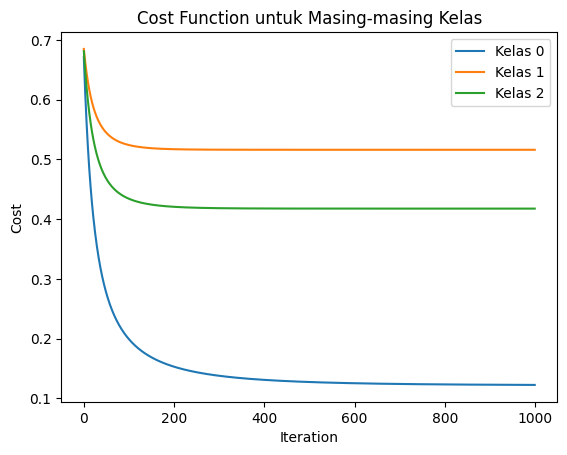

In [ ]:
plot_cost_function(cost_total_comparation, len(np.unique(y_test)))

## 10. Compare your Logistic Regression model with and without regularisation, you can compare by the values of thetha in both of the model (in plot or in table) (score: 2)

Semisal kita ambil nilai lambda = 100, alpha = 0.001, max_iter = 100

In [ ]:
theta_no_reg, cost_no_reg = train(X_train, y_train, 100, 0.001, 100, reg = 0)
print (theta_no_reg)

Class 0: 

Histori cost: 
Cost untuk iterasi ke-0 : 0.6929255429143426
Cost untuk iterasi ke-10 : 0.6907158004845526
Cost untuk iterasi ke-20 : 0.6885180735601402
Cost untuk iterasi ke-30 : 0.6863322960010795
Cost untuk iterasi ke-40 : 0.6841584017870839
Cost untuk iterasi ke-50 : 0.6819963250230681
Cost untuk iterasi ke-60 : 0.6798459999445006
Cost untuk iterasi ke-70 : 0.6777073609226528
Cost untuk iterasi ke-80 : 0.6755803424697402
Cost untuk iterasi ke-90 : 0.6734648792439588

Theta: [-0.01648206 -0.03197062  0.02939422]

Class 1: 

Histori cost: 
Cost untuk iterasi ke-0 : 0.6930663086447124
Cost untuk iterasi ke-10 : 0.6922600076032438
Cost untuk iterasi ke-20 : 0.691458086226977
Cost untuk iterasi ke-30 : 0.690660520427673
Cost untuk iterasi ke-40 : 0.6898672861885236
Cost untuk iterasi ke-50 : 0.6890783595653007
Cost untuk iterasi ke-60 : 0.688293716687478
Cost untuk iterasi ke-70 : 0.6875133337593238
Cost untuk iterasi ke-80 : 0.6867371870609685
Cost untuk iterasi ke-90 : 0.685

In [ ]:
theta_reg, cost_reg = train(X_train, y_train, 100, 0.001, 100, reg = 1)
print (theta_reg)

Class 0: 

Histori cost: 
Cost untuk iterasi ke-0 : 0.6929256237018762
Cost untuk iterasi ke-10 : 0.6907342901774496
Cost untuk iterasi ke-20 : 0.6885863552197993
Cost untuk iterasi ke-30 : 0.6864808845983427
Cost untuk iterasi ke-40 : 0.6844169643896273
Cost untuk iterasi ke-50 : 0.6823937005486149
Cost untuk iterasi ke-60 : 0.6804102184881846
Cost untuk iterasi ke-70 : 0.6784656626667406
Cost untuk iterasi ke-80 : 0.676559196183811
Cost untuk iterasi ke-90 : 0.6746900003835248

Theta: [-0.01648153 -0.0306926   0.02821952]

Class 1: 

Histori cost: 
Cost untuk iterasi ke-0 : 0.6930663319003305
Cost untuk iterasi ke-10 : 0.6922653300858473
Cost untuk iterasi ke-20 : 0.6914777419712307
Cost untuk iterasi ke-30 : 0.6907032936163663
Cost untuk iterasi ke-40 : 0.6899417169425882
Cost untuk iterasi ke-50 : 0.6891927496085914
Cost untuk iterasi ke-60 : 0.6884561348888318
Cost untuk iterasi ke-70 : 0.6877316215543676
Cost untuk iterasi ke-80 : 0.6870189637560986
Cost untuk iterasi ke-90 : 0.6

### Perbandingan pada kelas 0

In [ ]:
compare_class_0 = pd.DataFrame({"no_regularization": theta_no_reg[:, 0], "regularization": theta_reg[:, 0]}, index = ['Theta 0', 'Theta 1', 'Theta 2'])

In [ ]:
compare_class_0

,no_regularization,regularization
Theta 0,-0.016482,-0.016482
Theta 1,-0.031971,-0.030693
Theta 2,0.029394,0.028220


### Perbandingan pada kelas 1

In [ ]:
compare_class_1 = pd.DataFrame({"no_regularization": theta_no_reg[:, 1], "regularization": theta_reg[:, 1]}, index = ['Theta 0', 'Theta 1', 'Theta 2'])

In [ ]:
compare_class_1

,no_regularization,regularization
Theta 0,-0.015634,-0.015634
Theta 1,0.005121,0.004917
Theta 2,-0.022732,-0.021823


### Perbandingan pada kelas 2

In [ ]:
compare_class_2 = pd.DataFrame({"no_regularization": theta_no_reg[:, 2], "regularization": theta_reg[:, 2]}, index = ['Theta 0', 'Theta 1', 'Theta 2'])

In [ ]:
compare_class_2

,no_regularization,regularization
Theta 0,-0.017270,-0.017270
Theta 1,0.028868,0.027714
Theta 2,-0.007146,-0.006861


Dapat dilihat bahwasanya nilai theta 0 tidak berubah ketika diregularisasi maupun tidak, sesuai dengan rumus dari gradient descent yang sama pada theta 0 di regularisasi dengan seluruh nilai theta di non-regularisasi